# 1er TP Redes Neuronales II 
## Alumno: Vazquez Agustin     Legajo: 61420 

In [63]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np

In [64]:
def plotMatrix(matrix,title,size):
    plt.figure(figsize=size)
    plt.imshow(matrix, aspect='auto',interpolation = None)
    plt.colorbar()
    plt.title(title)
    plt.show()

In [65]:
TNG_train = fetch_20newsgroups(subset="train",remove=('headers', 'footers', 'quotes'))

In [4]:
cv = CountVectorizer(ngram_range=(1,1), max_df=1.0, min_df=25, max_features=None, stop_words="english")
cv_tfid = TfidfVectorizer(ngram_range=(1,1), max_df=1.0, min_df=25, max_features=None, stop_words="english")

In [5]:
TNG_cv = cv.fit_transform(TNG_train.data)
TNG_cv_tfid = cv_tfid.fit_transform(TNG_train.data)

In [6]:
#Tamaño del vocabulario
print(f'CV: {len(cv.get_feature_names_out())}')
print(f'CV TFID: {len(cv_tfid.get_feature_names_out())}')
(cv.get_feature_names_out() == cv_tfid.get_feature_names_out()) # Tienen el mismo vocabulario.

CV: 4983
CV TFID: 4983


array([ True,  True,  True, ...,  True,  True,  True])

In [7]:
#Matriz termino-documento de ambos algoritmos
matrixTD_cv = TNG_cv.toarray()
matrixTD_cv_tfid = TNG_cv_tfid.toarray()

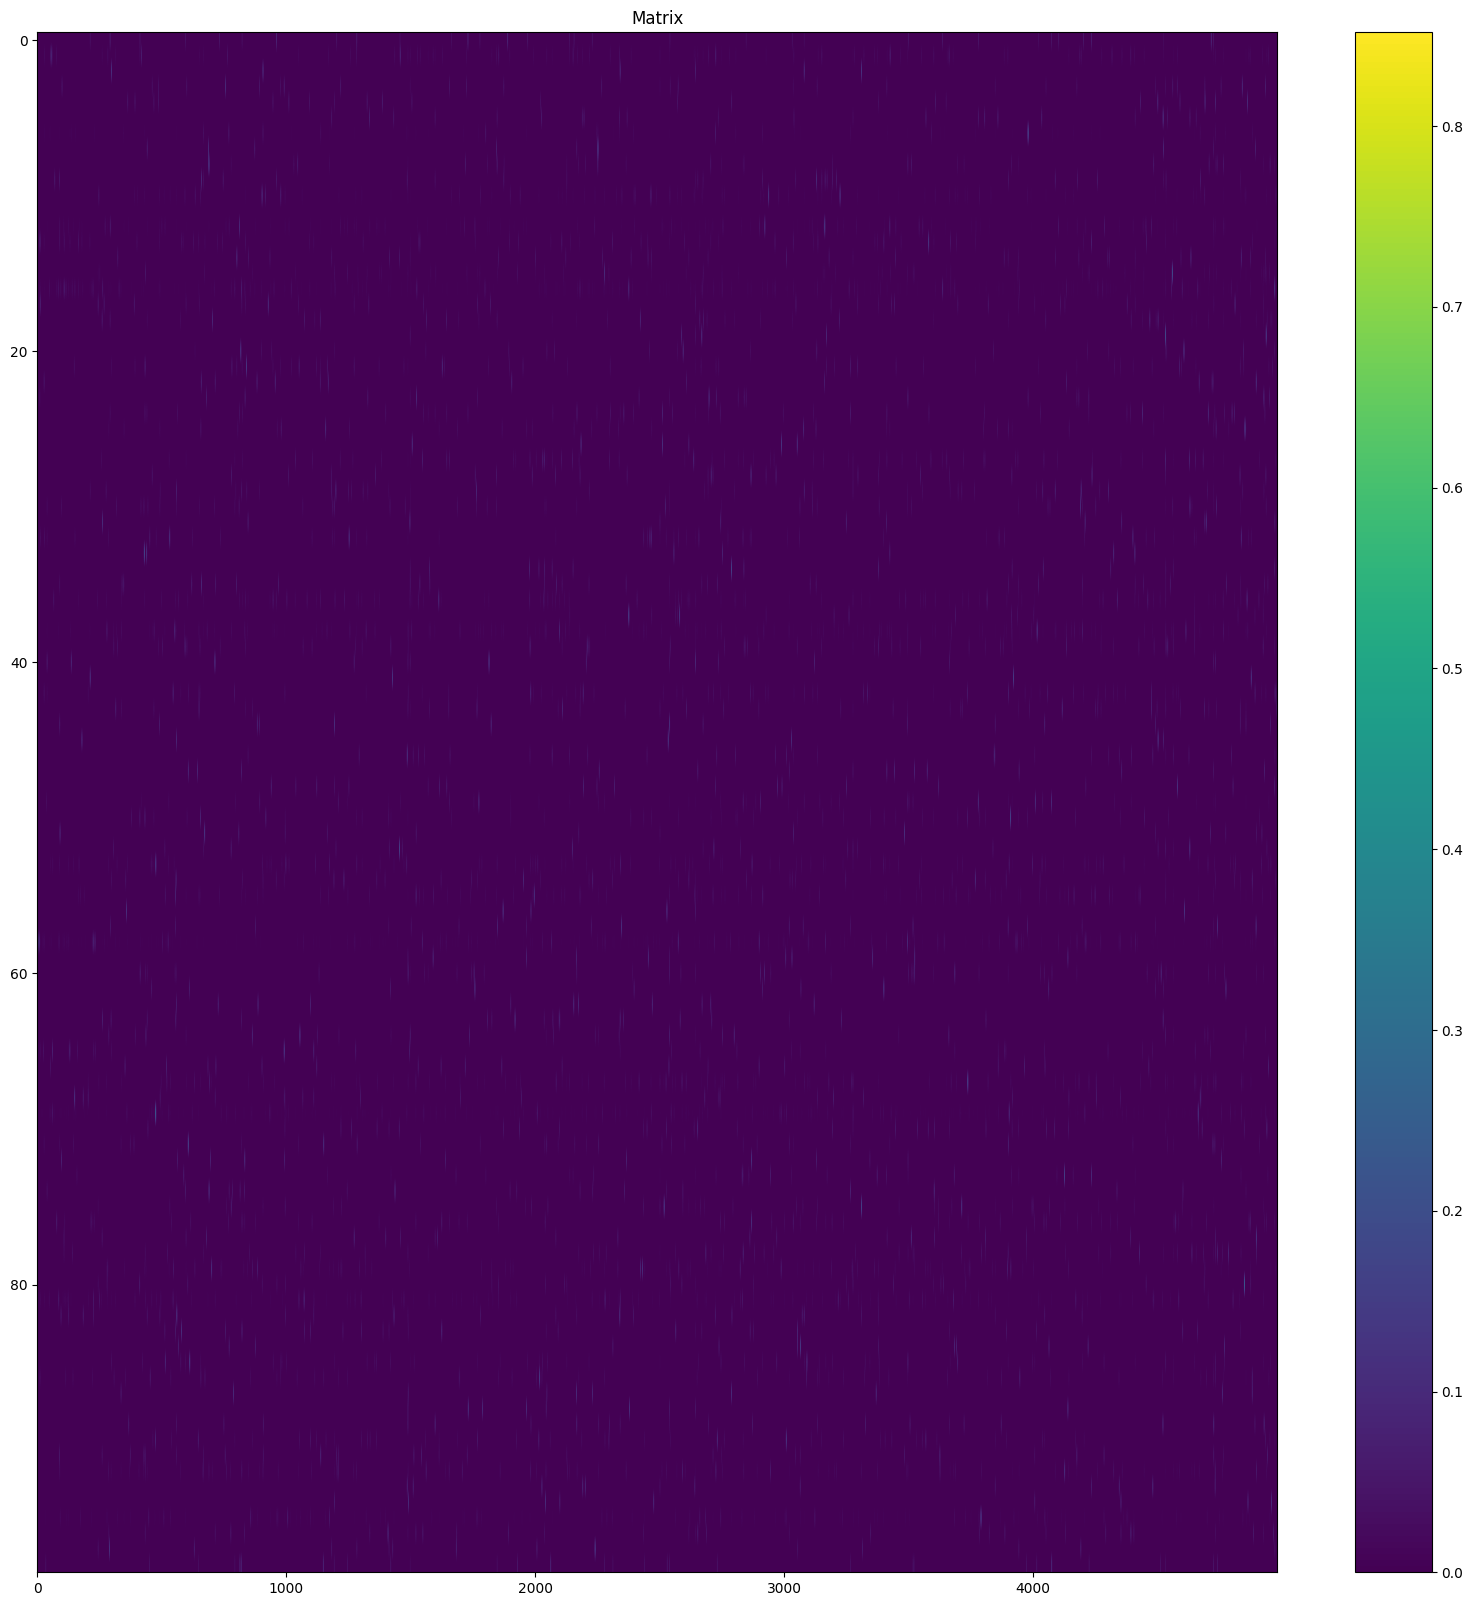

In [8]:
plotMatrix(matrixTD_cv_tfid[:][1:100],"Matrix",(20,20)) #Representamos solo los primeros 100 documentos.

In [9]:
#Normailzamos ambos algoritmos de vectorizacion.
TNG_norm_tfid = (matrixTD_cv_tfid.T/(np.linalg.norm(matrixTD_cv_tfid, axis=-1)+1e-8)).T
TNG_norm = (matrixTD_cv.T/(np.linalg.norm(matrixTD_cv, axis=-1)+1e-8)).T

Ahora voy a buscar las similitudes entre un texto arbitrario y sus compañeros.

In [10]:
index2Search = 40
print(TNG_train.data[index2Search])
print(f'Class {TNG_train.target_names[TNG_train.target[index2Search]]}')

 



Ted, you're missing a vital point.  As Roger Lustig pointed out in a
previous response, the reason why Schott was banned from baseball was
because she had been known to call and think in a racially biased manner on
a constant basis.  Such thoughts affected her hiring practices.  Bonilla,
on the other hand, was found to have mentioned this one word a single time.
 If he had been known to go around, criticizing homosexuals, it would be a
different story.  Furthermore, he is merely an athlete.  He doesn't have to
hire anyone as Schott had to do.  Dave Pallone, the former NL umpire who is
an admitted homosexual, has decided to assist in a protest before a Mets
game at Shea.  He, like you, thinks that Bonilla should be suspended from
baseball.  Pallone is hoping for a year's suspension.  In my opinion,
that's downright ludicrous.  As Howie Rose on WFAN said, if you start
suspending athletes who have mentioned a derogatory word even a single time
under whatever conditions, then you'd pr

In [11]:
cosines_cv = np.dot(TNG_norm[index2Search], TNG_norm.T) #Para no quedarme con el mismo texto.
cosines_cv_tfid = np.dot(TNG_norm_tfid[index2Search], TNG_norm_tfid.T) #Para no quedarme con el mismo texto.
neigh_idx_cv = np.array(cosines_cv).flatten().argsort()[::-1]
neigh_idx_cv_tfid = np.array(cosines_cv_tfid).flatten().argsort()[::-1]

In [12]:
matrixTD_cv[index2Search].reshape(1,-1)
matrixTD_cv.shape[0]

11314

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
matrix_sim = np.zeros(matrixTD_cv.shape[0])
matrix_sim_tfid = np.zeros(matrixTD_cv.shape[0])
for i in range(matrixTD_cv.shape[0]):
    matrix_sim[i] = cosine_similarity(matrixTD_cv[index2Search].reshape(1,-1),matrixTD_cv[i].reshape(1,-1))
    matrix_sim_tfid[i] = cosine_similarity(matrixTD_cv_tfid[index2Search].reshape(1,-1),matrixTD_cv_tfid[i].reshape(1,-1))

In [14]:
print(matrix_sim_tfid[matrix_sim_tfid.argsort()[::-1]][0:50])
print(cosines_cv_tfid[neigh_idx_cv_tfid][0:50])

[1.         0.21046922 0.20471272 0.18615785 0.18218237 0.17596372
 0.17456422 0.1666063  0.16232959 0.1594447  0.14666823 0.13641242
 0.13600446 0.13413764 0.13344189 0.13034249 0.12968069 0.12956353
 0.12907549 0.12894158 0.12887517 0.12859751 0.12618369 0.1242123
 0.12397785 0.12190948 0.12178994 0.12085391 0.12056064 0.12049809
 0.12045923 0.11965045 0.11951195 0.11932315 0.1176068  0.11701118
 0.11675394 0.11581411 0.115643   0.11538728 0.11487838 0.11375941
 0.11287844 0.11251289 0.11244074 0.11241826 0.11239102 0.11171327
 0.11161477 0.11155882]
[0.99999998 0.21046921 0.20471272 0.18615785 0.18218237 0.17596372
 0.17456422 0.1666063  0.16232959 0.1594447  0.14666823 0.13641242
 0.13600446 0.13413764 0.13344188 0.13034248 0.12968068 0.12956353
 0.12907548 0.12894158 0.12887517 0.12859751 0.12618369 0.1242123
 0.12397785 0.12190947 0.12178994 0.12085391 0.12056064 0.12049809
 0.12045923 0.11965045 0.11951194 0.11932315 0.1176068  0.11701118
 0.11675394 0.11581411 0.11564299 0.1153

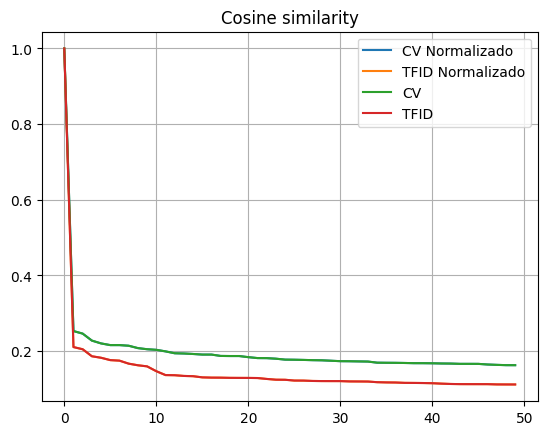

In [15]:
plt.plot(cosines_cv[neigh_idx_cv][0:50],label = 'CV Normalizado')
plt.plot(cosines_cv_tfid[neigh_idx_cv_tfid][0:50],label = 'TFID Normalizado')
plt.plot(matrix_sim[matrix_sim.argsort()[::-1]][0:50],label = 'CV')
plt.plot(matrix_sim_tfid[matrix_sim_tfid.argsort()[::-1]][0:50],label = 'TFID')
plt.title('Cosine similarity')
plt.legend()
plt.grid()
plt.show()

Observamos que a priori el valor de la similitud coseno es más selectiva en TFID que en CV

In [16]:
print(neigh_idx_cv[0:9])
print(neigh_idx_cv_tfid[0:9])

[   40  9644  4051 10688   736  8562  9699 10779  4221]
[   40   736 10688  9699  9644 10047  8253  4761  2828]


Vemos que tampoco son los mismos textos a los que se hace referencia, solo coinciden en el texto que mas similitud coseno tiene.

In [17]:
print(f'Clase del texto referencia:  {TNG_train.target_names[TNG_train.target[index2Search]]}')
print(f'Clases de los textos con CV: {[TNG_train.target_names[TNG_train.target[idx]] for idx in neigh_idx_cv[0:9]]}')
print(f'Clases de los textos con TFID: {[TNG_train.target_names[TNG_train.target[idx]] for idx in neigh_idx_cv_tfid[0:9]]}')

Clase del texto referencia:  rec.sport.baseball
Clases de los textos con CV: ['rec.sport.baseball', 'rec.sport.baseball', 'talk.politics.misc', 'rec.sport.baseball', 'rec.sport.hockey', 'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism', 'rec.sport.baseball']
Clases de los textos con TFID: ['rec.sport.baseball', 'rec.sport.hockey', 'rec.sport.baseball', 'talk.politics.mideast', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'sci.med', 'rec.sport.baseball']


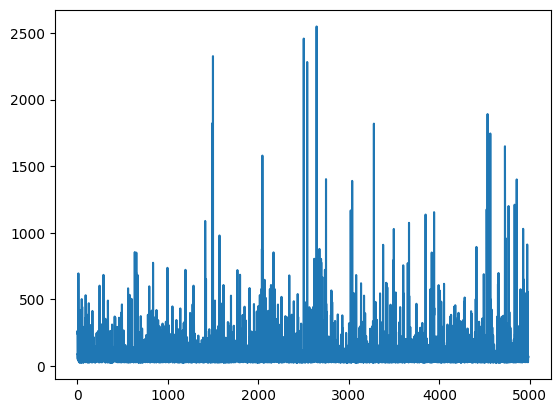

In [18]:
plt.plot([TNG_cv.astype(bool).toarray().T[idx].sum() for idx in range(len(cv.get_feature_names_out()))])
plt.show()

---
---
---

## Ahora vamos a implementar con SVD con N componentes.

In [19]:
compo= 100
red = TruncatedSVD(n_components=compo)
TNG_cv_red = red.fit_transform(TNG_cv)
TNG_cv_tfid_red = red.fit_transform(TNG_cv_tfid)

In [20]:
index2Search = 10
print(TNG_train.data[index2Search])
print(f'Class {TNG_train.target_names[TNG_train.target[index2Search]]}')

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
Class rec.motorcycles


In [21]:
matrix_sim = np.zeros(TNG_cv_tfid_red.shape[0])
matrix_sim_tfid = np.zeros(TNG_cv_tfid_red.shape[0])
for i in range(matrixTD_cv.shape[0]):
    matrix_sim[i] = cosine_similarity(TNG_cv_red[index2Search].reshape(1,-1),TNG_cv_red[i].reshape(1,-1))
    matrix_sim_tfid[i] = cosine_similarity(TNG_cv_tfid_red[index2Search].reshape(1,-1),TNG_cv_tfid_red[i].reshape(1,-1))

In [22]:
print(f'Clase del texto referencia:  {TNG_train.target_names[TNG_train.target[index2Search]]}')
print(f'Clases de los textos con CV: {[TNG_train.target_names[TNG_train.target[idx]] for idx in matrix_sim.argsort()[::-1][0:9]]}')
print(f'Clases de los textos con TFID: {[TNG_train.target_names[TNG_train.target[idx]] for idx in matrix_sim_tfid.argsort()[::-1][0:9]]}')

Clase del texto referencia:  rec.motorcycles
Clases de los textos con CV: ['rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles']
Clases de los textos con TFID: ['rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles']


In [23]:
for idx in matrix_sim.argsort()[::-1][0:4]:
    print(f'Index: {idx}  Cosine: {matrix_sim[idx]}' )
    print(TNG_train.data[idx])
    print(f'Class {TNG_train.target_names[TNG_train.target[idx]]}')
    print("**********************************************************************")

Index: 10  Cosine: 0.9999999999999998
I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
Class rec.motorcycles
**********************************************************************
Index: 9389  Cosine: 0.7356134705302981
Well, it looks like I'm F*cked for insurance.

I had a DWI in 91 and for the beemer, as a rec.
vehicle, it'll cost me almost $1200 bucks to insure/year

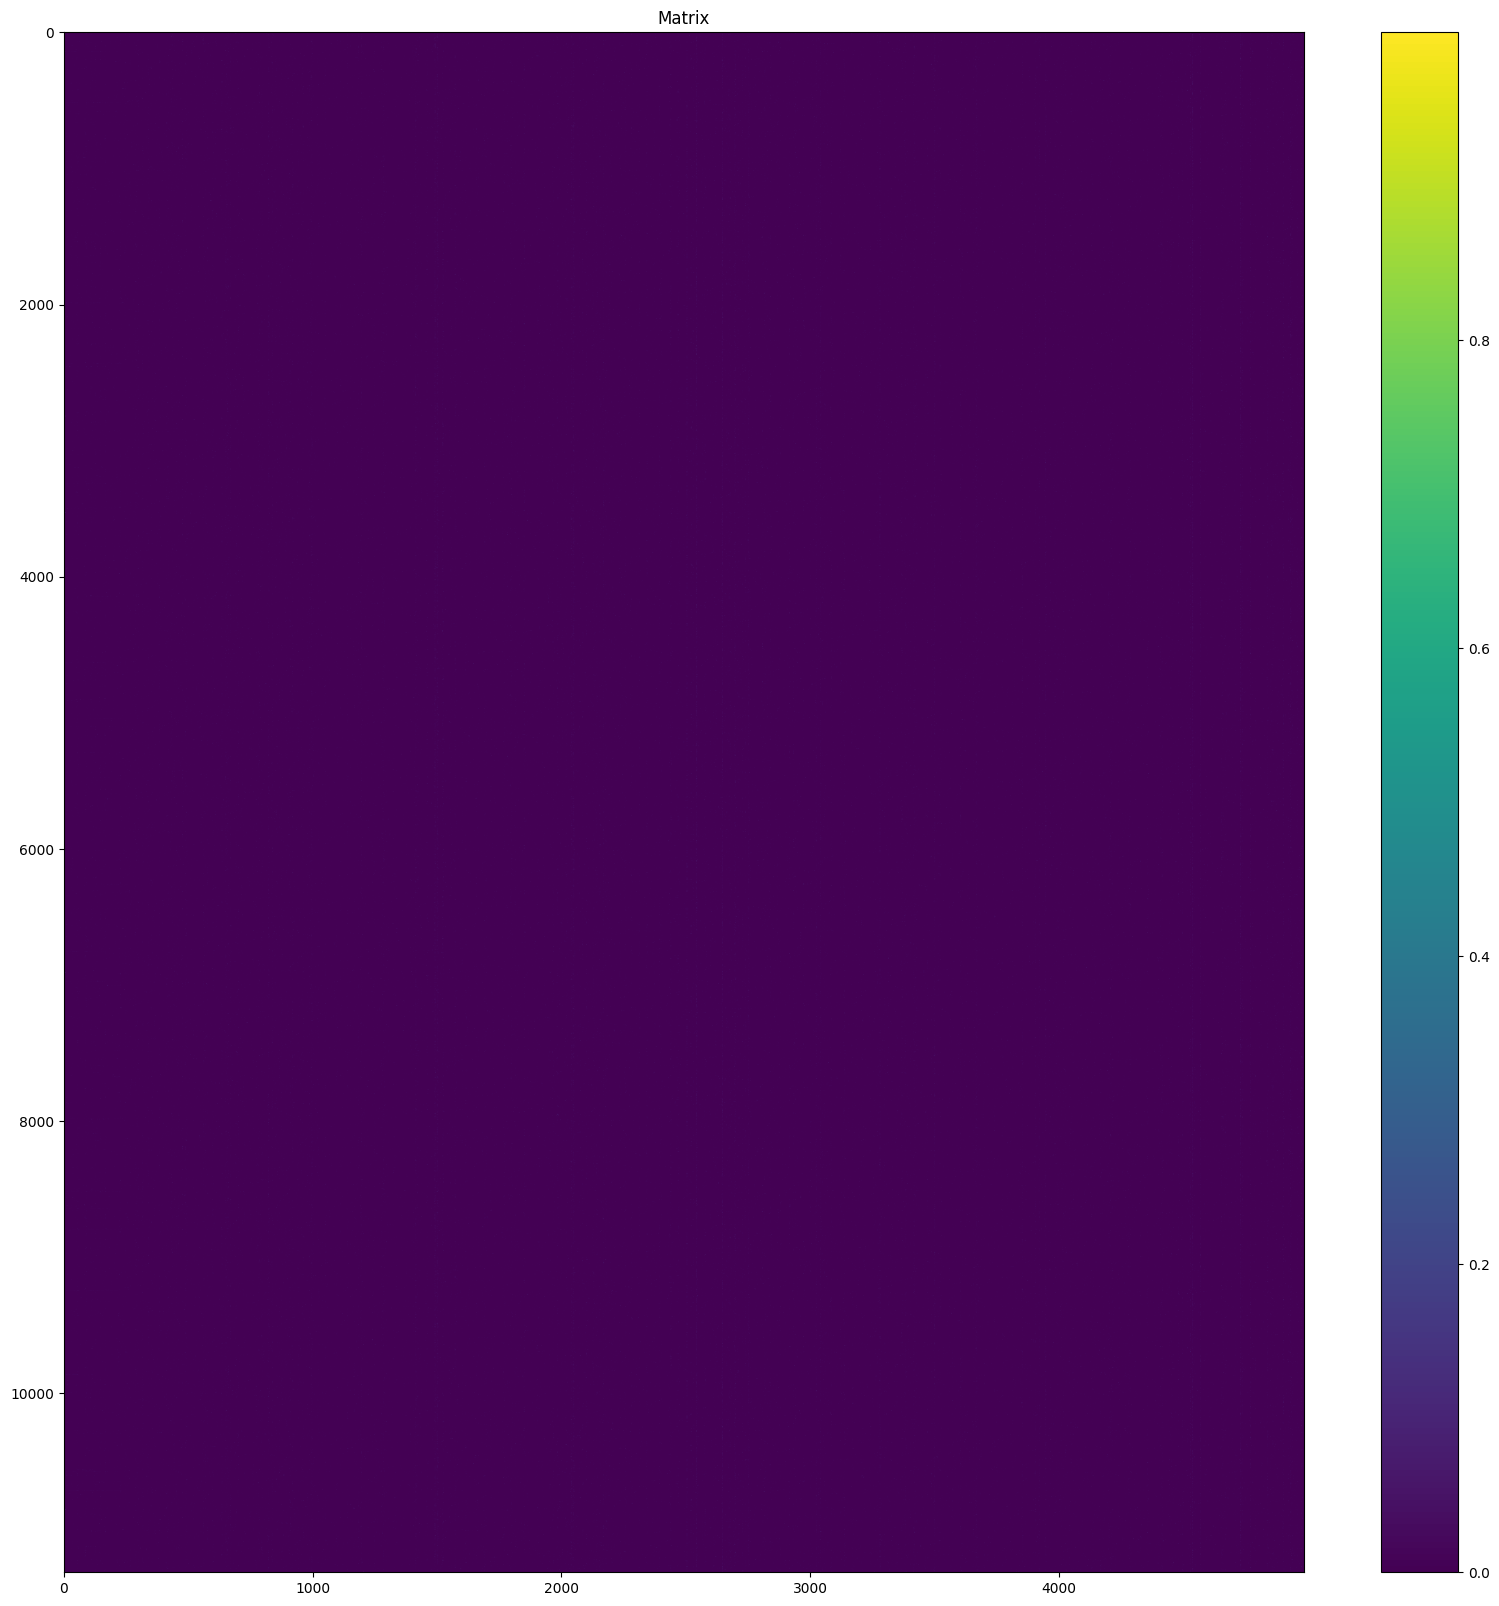

In [24]:
plotMatrix(TNG_norm,"Matrix",(20,20))

---
---
---


# Ahora si transponemos la matriz documento-término, obtenemos la matriz término-documento lo que nos proporciona embeddings para los términos.

In [25]:
words_emb_tfid  = TNG_cv_tfid.toarray().T
words_emb =  TNG_cv.toarray().T

Ambas matrices cuentan con el mismo diccionario, pero eso no implica que cada palabra haya obtenido el mismo embedding. Por lo que habrá que testear con ambos algoritmos.index2Search

In [26]:
index2Search = 4010
cv_tfid.get_feature_names_out()[index2Search]

'selected'

In [27]:
matrix_sim_w = np.zeros(matrixTD_cv.shape[0])
matrix_sim_tfid_w = np.zeros(matrixTD_cv.shape[0])
for i in range(words_emb_tfid.shape[0]):
    matrix_sim_w[i] = cosine_similarity(words_emb[index2Search].reshape(1,-1),words_emb[i].reshape(1,-1))
    matrix_sim_tfid_w[i] = cosine_similarity(words_emb_tfid[index2Search].reshape(1,-1),words_emb_tfid[i].reshape(1,-1))

In [28]:
print("*****************************  CV  ************************************")
for idx in matrix_sim_w.argsort()[::-1][1:10]:
    print(f'Index: {idx}  Cosine: {matrix_sim_w[idx]}\n')
    print(cv_tfid.get_feature_names_out()[idx])
    print()
print("****************************  TFID  ***********************************")
for idx in matrix_sim_tfid_w.argsort()[::-1][1:10]:
    print(f'Index: {idx}  Cosine: {matrix_sim_tfid_w[idx]}\n')
    print(cv_tfid.get_feature_names_out()[idx])
    print()

*****************************  CV  ************************************
Index: 4011  Cosine: 0.38359660913962385

selection

Index: 809  Cosine: 0.38168311675289623

candidates

Index: 808  Cosine: 0.3496910994039048

candidate

Index: 3769  Cosine: 0.33604255159544194

reported

Index: 3785  Cosine: 0.3313269043775389

requirements

Index: 3080  Cosine: 0.32700919910906356

number

Index: 1388  Cosine: 0.31497039417435607

detailed

Index: 3499  Cosine: 0.310714405746143

procedures

Index: 2794  Cosine: 0.3098895286788659

master

****************************  TFID  ***********************************
Index: 1460  Cosine: 0.1715761951087281

displayed

Index: 592  Cosine: 0.14367815102009937

bar

Index: 2220  Cosine: 0.12598677328944174

horizontal

Index: 4009  Cosine: 0.09903735007651483

select

Index: 1090  Cosine: 0.09853392403384792

connectors

Index: 2840  Cosine: 0.09852715759927229

menu

Index: 2228  Cosine: 0.0982749902006258

hotel

Index: 4011  Cosine: 0.09484173190271

---
---
---

# Matriz término-clase
> Aqui voy a agarrar la vectorizacion cv clásica ya que se pueden sumar sus componentes aplicando la linealidad de dicha vectorización.

In [29]:
termClassMatrix = np.zeros([20,len(cv_tfid.get_feature_names_out())])

In [30]:
for i in range(len(TNG_train.data)):
    termClassMatrix[TNG_train.target[i]] +=  matrixTD_cv[i]

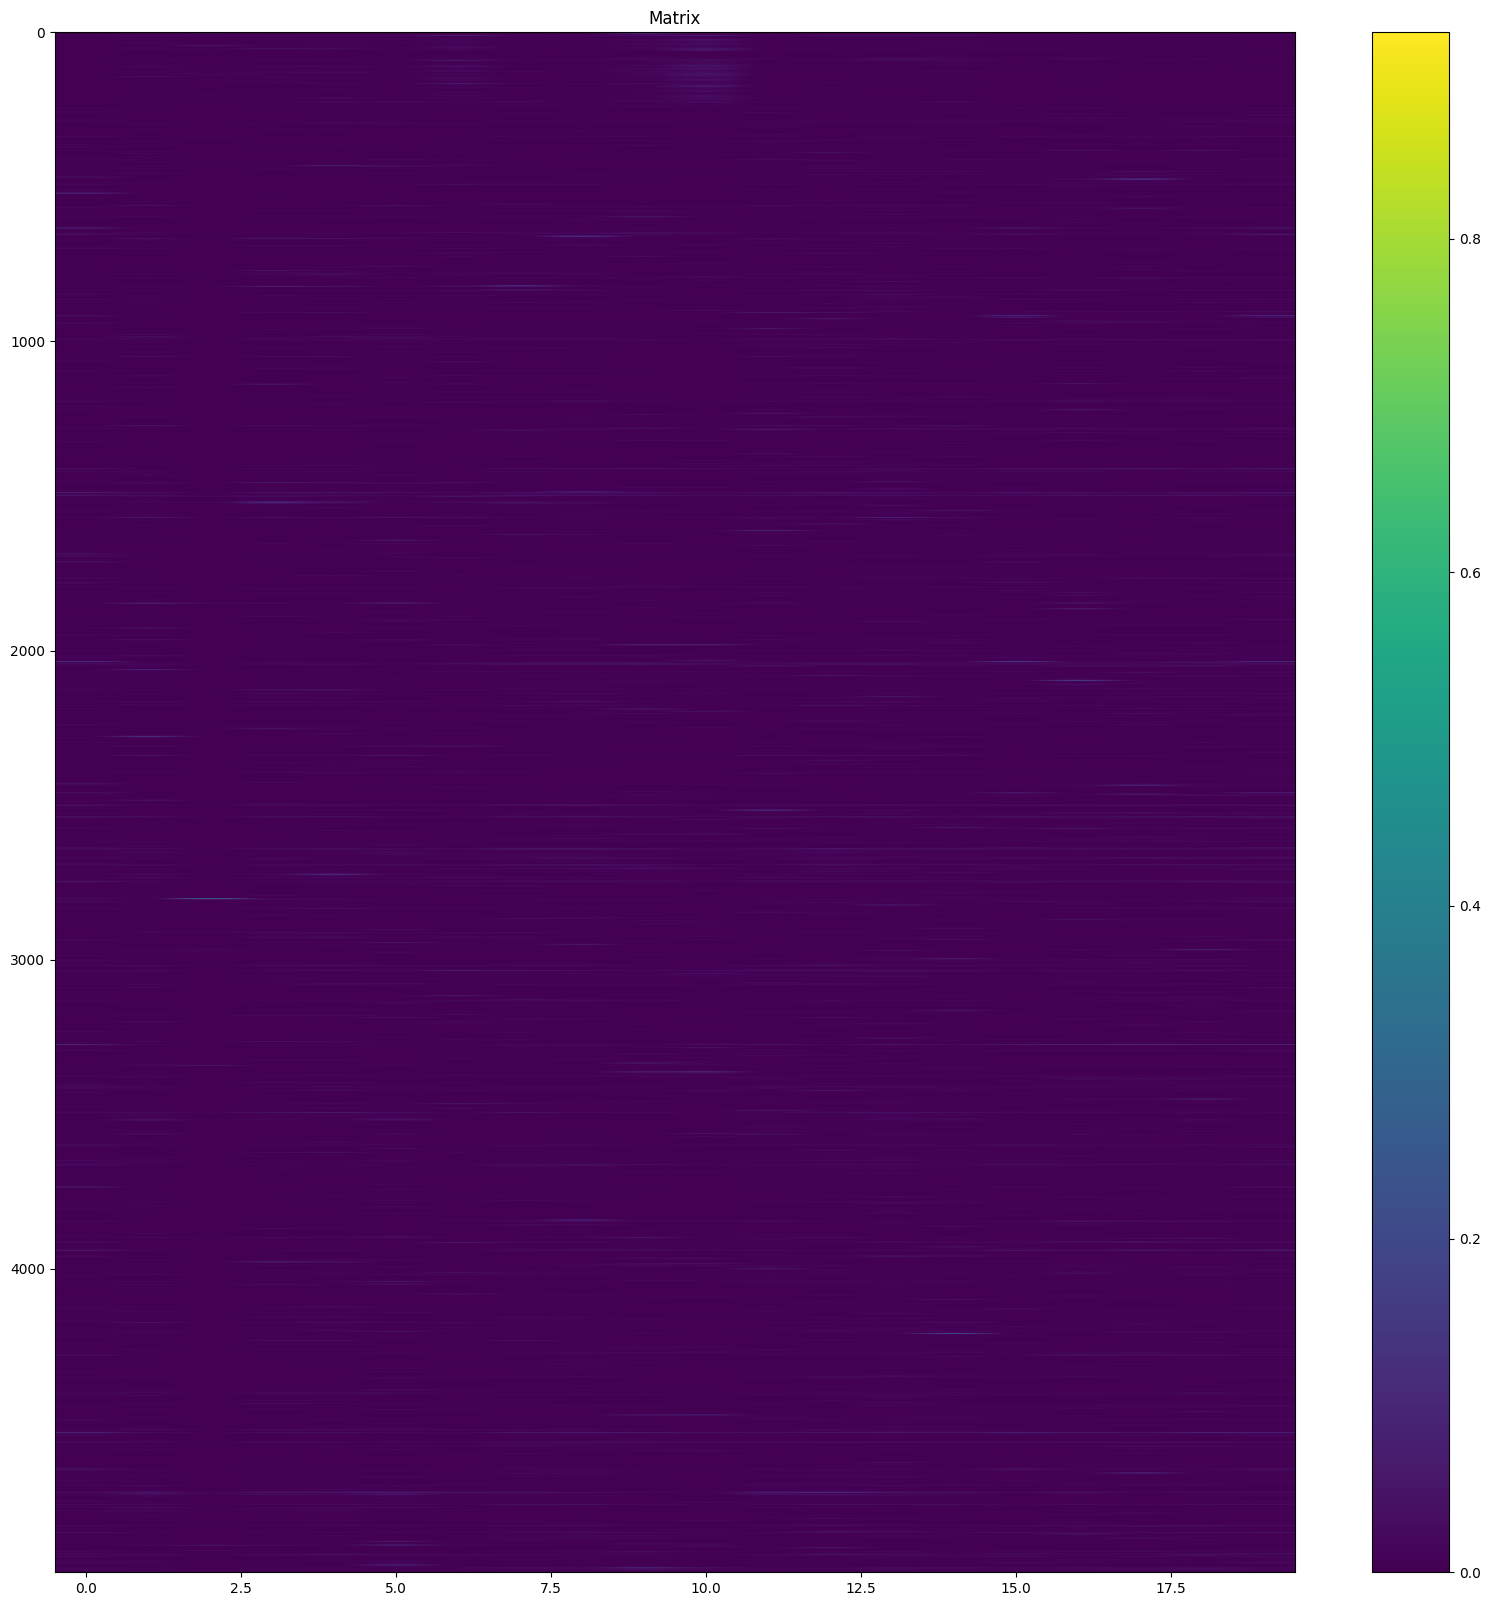

In [31]:
plotMatrix((termClassMatrix.T/(np.linalg.norm(termClassMatrix, axis=-1)+1e-8)),"Matrix",(20,20))

In [32]:
index2Search = 400
print(cv_tfid.get_feature_names_out()[index2Search])
matrix_sim_w_tc = np.zeros(termClassMatrix.shape[1])
for i in range(termClassMatrix.shape[1]):
    matrix_sim_w_tc[i] = cosine_similarity(termClassMatrix.T[index2Search].reshape(1,-1),termClassMatrix.T[i].reshape(1,-1))

anger


In [33]:
for idx in matrix_sim_w_tc.argsort()[::-1][1:10]:
    print(f'Index: {idx}  Cosine: {matrix_sim_w_tc[idx]}\n')
    print(cv_tfid.get_feature_names_out()[idx])
    print()

Index: 402  Cosine: 0.9594640196525479

angry

Index: 3721  Cosine: 0.9288665503169201

relate

Index: 2491  Cosine: 0.922602241866007

judgement

Index: 4463  Cosine: 0.9211333958779578

taught

Index: 2164  Cosine: 0.9140839316638533

hell

Index: 4608  Cosine: 0.9010055102984827

traditional

Index: 3022  Cosine: 0.8990258186951098

needless

Index: 3259  Cosine: 0.8926949002321112

paul

Index: 3937  Cosine: 0.8906960767615111

saved



Cobra sentido dado que hemos reducido la dimensionalidad del problema a tan solo 20 dimensiones por lo que hemos perdido de cierta manera informacion y por eso los valores de coseno simulitud dan tan altos aun asi cuando no son del todo similares.

Por ejemplo en este caso, pobre Paul que lo asocian con angry.

---
---
---


# Matríz término-término
> Para esto vamos a hacer uso de diversas funciones que provee la biblioteca de keras.

In [66]:
from keras.preprocessing.sequence import make_sampling_table, skipgrams
from keras.preprocessing.text import Tokenizer
from scipy.sparse import csr_matrix,lil_matrix

In [95]:
vsize = 10001
wsize = 2
tokenizer = Tokenizer(num_words=vsize-1)
tokenizer.fit_on_texts(TNG_train.data)
seqs=tokenizer.texts_to_sequences(TNG_train.data)


In [96]:
data, labels = skipgrams(sequence=seqs[0], vocabulary_size=vsize, window_size=wsize, negative_samples=0, sampling_table=make_sampling_table(vsize, sampling_factor=1e-5), shuffle=False)

In [97]:
counts_matrix=lil_matrix((vsize,vsize))

In [98]:
seqs=np.hstack(seqs).astype(int)

In [99]:
pairs, labels = skipgrams(sequence=list(seqs), vocabulary_size=vsize, window_size=wsize, negative_samples=0, sampling_table=make_sampling_table(vsize, sampling_factor=1e-5), shuffle=False)

In [100]:
pairs_u, counts = np.unique(pairs,return_counts=True, axis=0)
for num,(pair,count) in enumerate(zip(pairs_u, counts)):
    counts_matrix[pair[0],pair[1]] += count

In [101]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10, metric="cosine")
neigh.fit(counts_matrix)
idx_1 = tokenizer.word_index["good"]
_, neig = neigh.kneighbors(counts_matrix[idx_1:idx_1+1])
for n in neig[0]:
    print(tokenizer.index_word[n])

good
simple
nice
valid
little
bad
reasonable
small
great
wonderful


La palabra base fue --> good

Resultados para una ventana de tamaño 2: 
* simple
* little
* strong
* bad
* small
* different
* valid
* complete
* decent
* moral

Resultados para una ventana de tamaño 5: 
* little
* small
* simple
* decent
* very
* while
* reasonable
* just
* christian
* for

Resultados para una ventana de tamaño 10: 
* very
* great
* a
* this
* bad
* it's
* there
* an
* it
* pretty

Podemos notar que no hay gran similitud entre estas palabras, pero esto es debido a que la base de datos no es lo suficientemente grande para generar embeddings lo suficientemente buenos. Es por esto que se usan embeddings ya preentrenados que fueron realizados con un dataset mucho mayor que el que ofrece 20NewsGroup.

Ademas, se observa que a medida que aumentamos la ventana de contexto, aparecen muchas más stopwords lo cual tiene todo el sentido.

---
---
---


# PPMI con SVD

In [102]:
PMI = (counts_matrix[1:,1:].sum(axis=1)/counts_matrix[1:,1:].sum()) + 1e-8

In [103]:
PMI = np.array(((counts_matrix[1:,1:]/counts_matrix[1:,1:].sum())/np.dot(PMI, PMI.T)))

In [104]:
#En estos pasos sucede el cambio de PMI a PPMI.
PMI=PMI*(PMI>1)+1e-8
PMI = np.log(PMI)
PPMI=PMI*(PMI>0)+1e-8

In [105]:
red = TruncatedSVD(n_components=300)
TNG_cv_red = red.fit_transform(PPMI)

In [106]:
neigh_svd = NearestNeighbors(n_neighbors=10, metric="cosine")
neigh_svd.fit(TNG_cv_red)
idx_2 = tokenizer.word_index["limit"]
_, neig = neigh_svd.kneighbors(TNG_cv_red[idx_2:idx_2+1])
for n in neig[0]:
    print(tokenizer.index_word[n])

limit
commercial
centuries
bxn
faster
balanced
together
doing
accelerate
proceeded


Para finalizar, podemos volver a reducir la dimensionalidad con TSNE y plotear la ubicación de los términos.

In [107]:
X_embedded = TSNE(n_components=2,metric="cosine").fit_transform(TNG_cv_red)

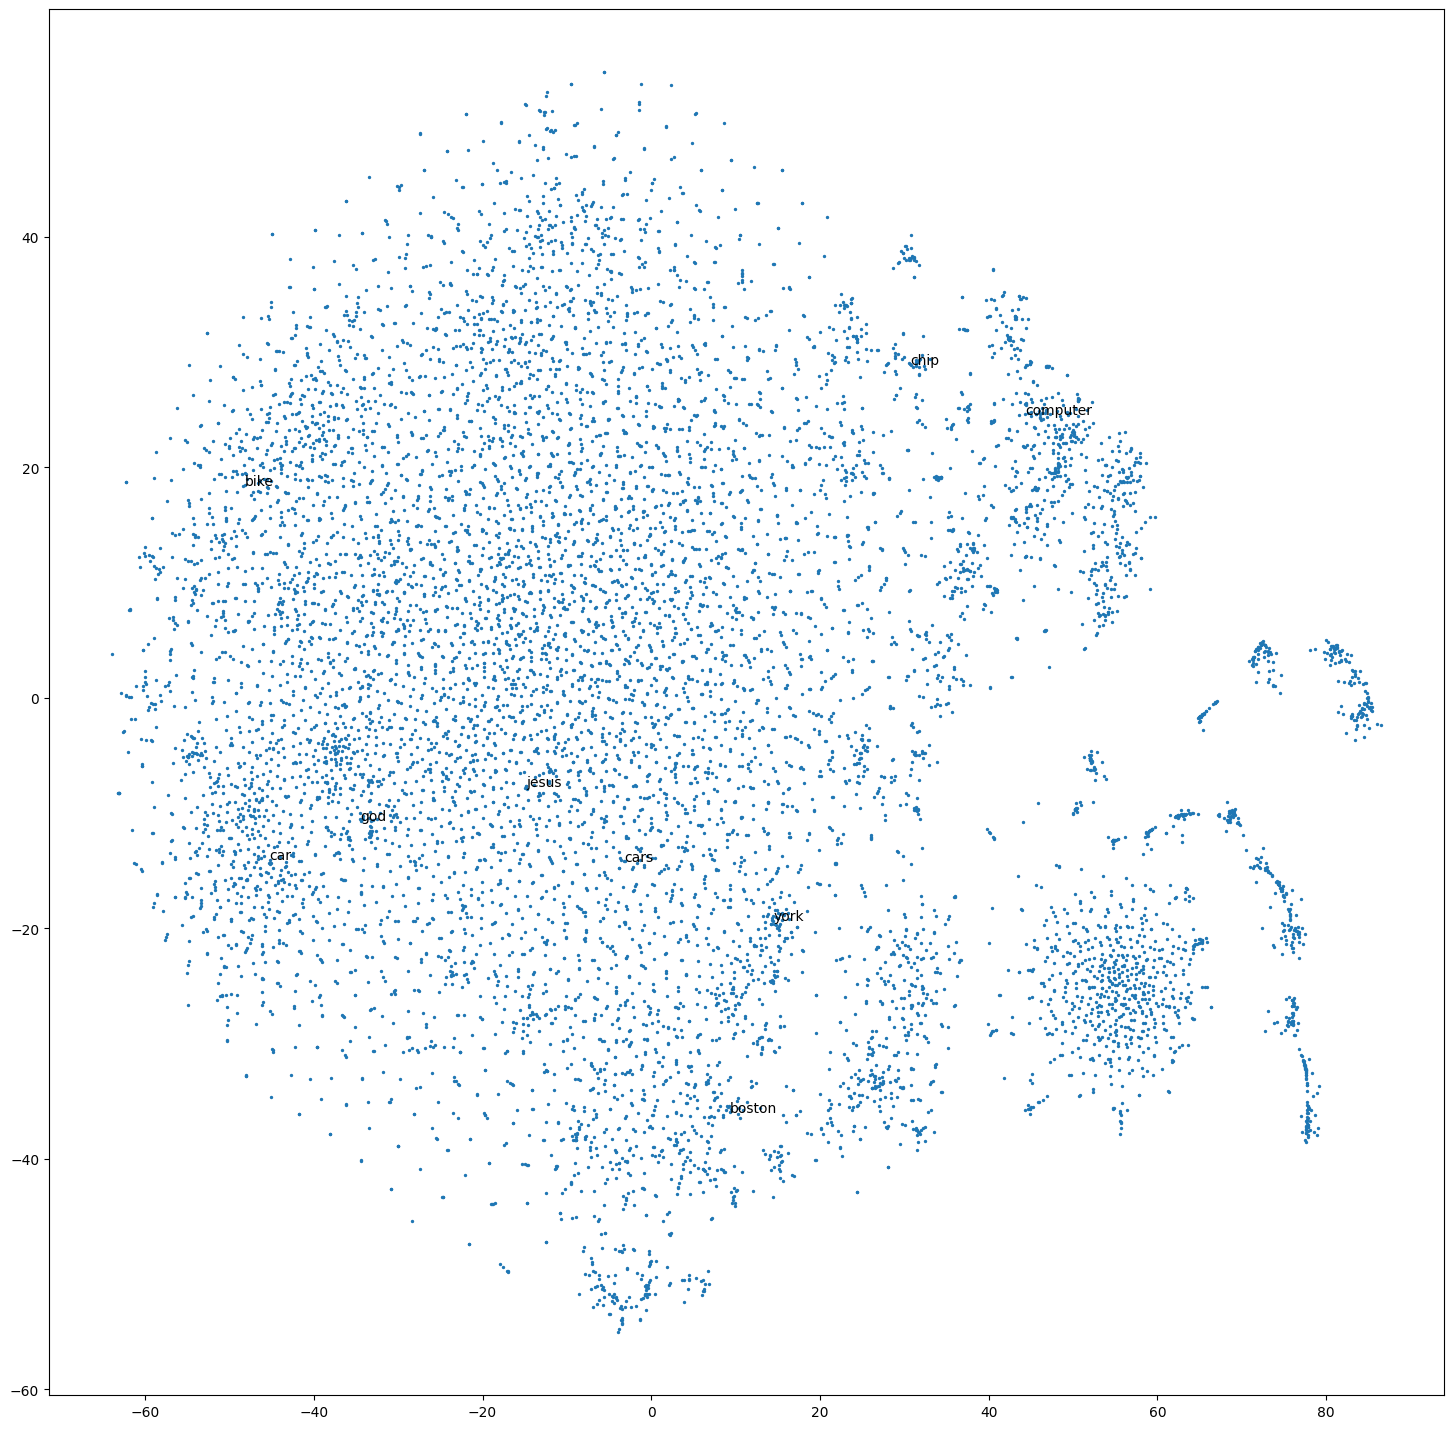

In [108]:
fig = plt.figure(figsize=[18,18])
plt.scatter(X_embedded[:,0],X_embedded[:,1], s=2)
words=["car","chip","computer", "god", "jesus", "boston", "limit", "human"]
for word in words:
    idx = tokenizer.word_index[word]
    plt.text(X_embedded[idx,0],X_embedded[idx,1],word)

Como se observa, no los términos que hubiesemos esperado que estén pegados, no son tan próximos como lo supuesto, esto tiene una hipotesis a priori y es la ventana de contexto que se tuvo en cuenta a la hora de ejecutar el script.

Se podría ejecutar el mismo script para gráficar la ubicación de los términos cuando teníamos la matriz de término-documento en donde hubiesemos obtenido quizás un resultado mejor, no obstante no llegué con los tiempos para realizar dicho test.